**Importing Libraries**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [46]:
titanic = pd.read_csv(r'train.csv')

**Exploratory Data Analysis**

In [47]:
titanic.shape

(891, 12)

In [48]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S


In [49]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [52]:
#Removing columns
titanic.drop(['Cabin','PassengerId'],axis=1,inplace=True)

Filling Nan Values

In [53]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\COBUY\AppData\Local\Temp\ipykernel_1540\2184073557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [54]:
titanic['Age'].fillna(titanic['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [55]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [56]:
titanic['Embarked'].fillna('S',inplace=True)

C:\Users\COBUY\AppData\Local\Temp\ipykernel_1540\3979945394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna('S',inplace=True)


Droping cabain Column as it doesn't contribute in analysis and has too many Nan values 

In [57]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Correlation between different columns

In [58]:
numeric_columns = titanic.select_dtypes(include=['number'])
numeric_columns.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: >

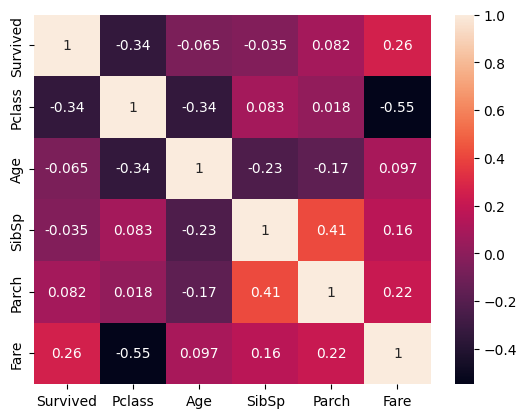

In [59]:
sns.heatmap(numeric_columns.corr(),annot =True)

**Univariate Analysis**

Text(0.5, 1.0, 'Survival Distribution')

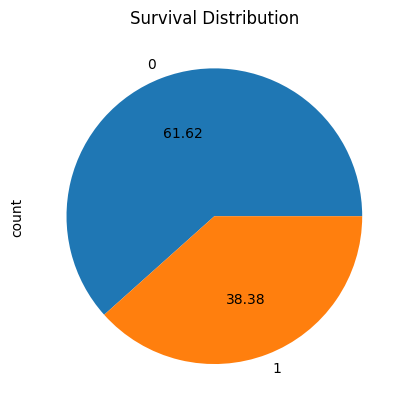

In [60]:
titanic['Survived'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.title('Survival Distribution')

<Axes: title={'center': 'People Distibution in different classes'}, xlabel='Pclass', ylabel='count'>

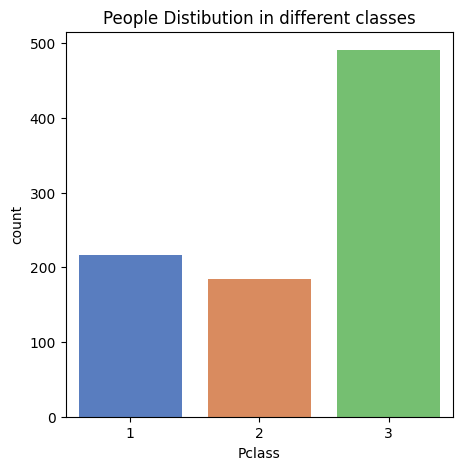

In [61]:
plt.figure(figsize=(5, 5))
plt.title('People Distibution in different classes')
sns.countplot(data=titanic,x='Pclass',hue='Pclass',palette='muted',legend=None)

<Axes: title={'center': 'Sex Distribution'}, xlabel='count', ylabel='Sex'>

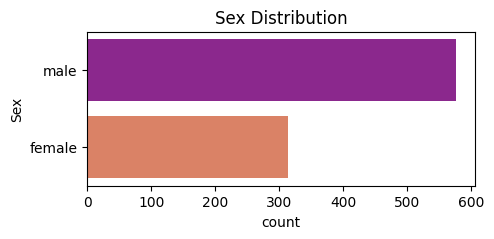

In [62]:
plt.figure(figsize=(5, 2))
plt.title('Sex Distribution')
sns.countplot(data=titanic,y='Sex',hue ='Sex',palette='plasma',legend=None)

<Axes: title={'center': 'Embarked Distribution'}, xlabel='Embarked', ylabel='count'>

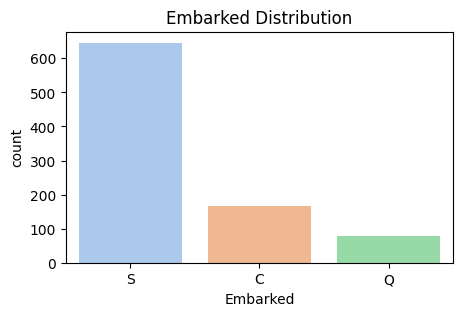

In [63]:
plt.figure(figsize=(5, 3))
plt.title('Embarked Distribution')
sns.countplot(data=titanic,x='Embarked',hue ='Embarked',palette='pastel',legend=None)

<Axes: title={'center': 'Outlier Detection in Fare'}, ylabel='Fare'>

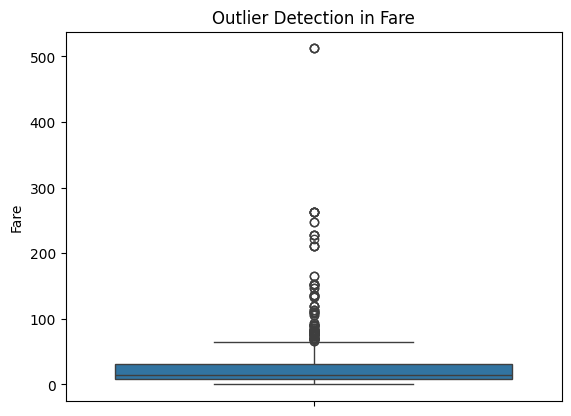

In [64]:
plt.title('Outlier Detection in Fare')
sns.boxplot(data=titanic,y='Fare')

<Axes: title={'center': 'Outlier Detection in Age'}, ylabel='Age'>

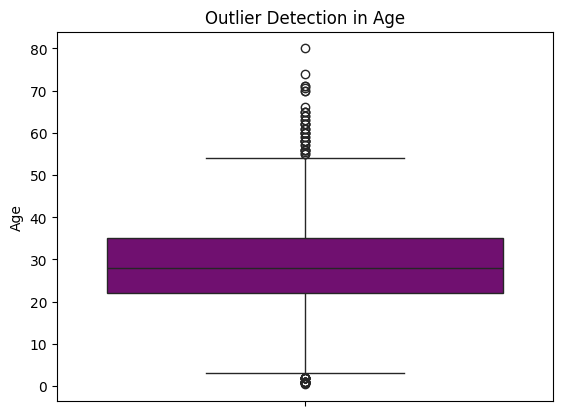

In [65]:
plt.title('Outlier Detection in Age')
sns.boxplot(data=titanic,y='Age',color='purple')

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

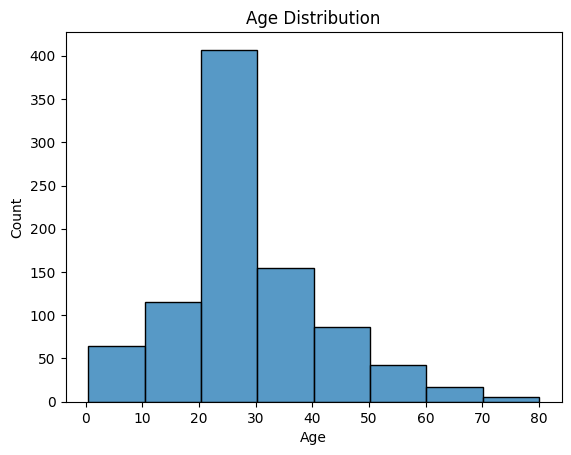

In [66]:
plt.title('Age Distribution')
sns.histplot(data=titanic,x='Age',bins=8)

In [67]:
titanic['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [68]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [71]:
print('Total Number of Children on Titanic = ',titanic['Parch'].sum())

Total Number of Children on Titanic =  340


**Bivariate Analysis** 

<Axes: title={'center': 'Age vs Pclass'}, xlabel='Pclass', ylabel='Age'>

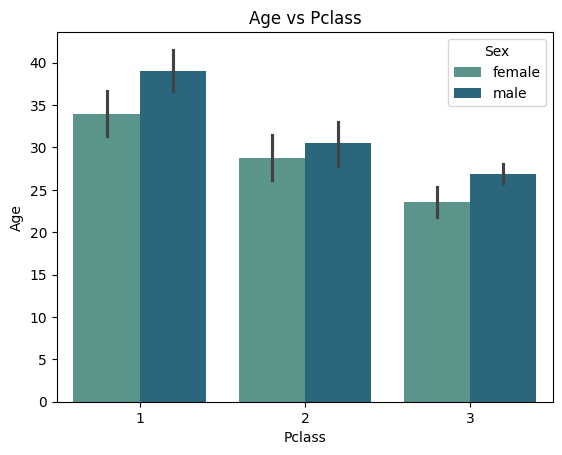

In [27]:
plt.title('Age vs Pclass')
sns.barplot(data=titanic,x='Pclass',y='Age',hue='Sex',palette='crest')

<Axes: title={'center': 'Fare vs Pclass'}, xlabel='Pclass', ylabel='Fare'>

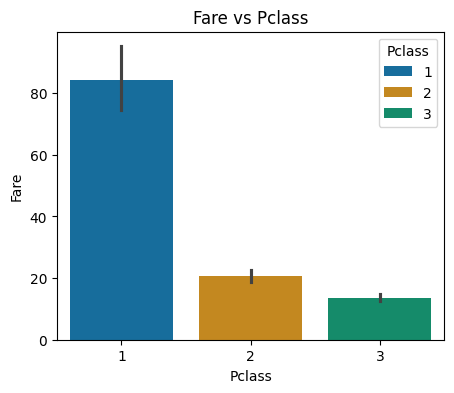

In [28]:
plt.figure(figsize=(5,4))
plt.title('Fare vs Pclass')
sns.barplot(data=titanic,x='Pclass',y='Fare',hue='Pclass',palette='colorblind')

<Axes: title={'center': 'Age vs Sex'}, xlabel='Sex', ylabel='Age'>

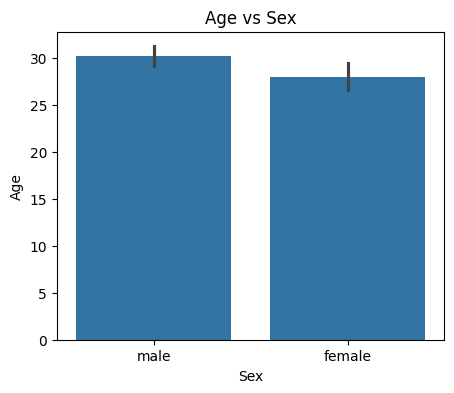

In [29]:
plt.figure(figsize=(5,4))
plt.title('Age vs Sex')
sns.barplot(data=titanic,x='Sex',y='Age')

<Axes: title={'center': 'Survival Distribution '}, xlabel='Sex', ylabel='Age'>

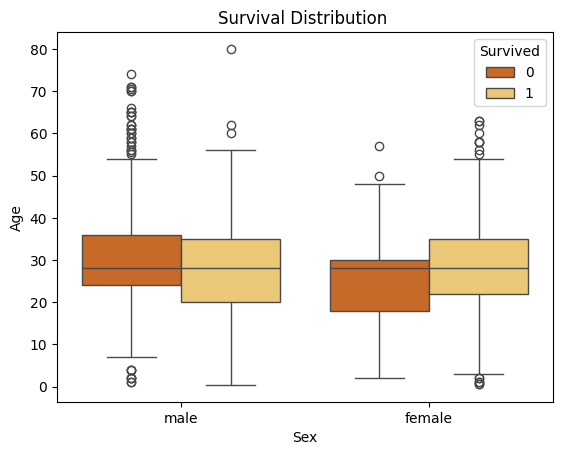

In [42]:
plt.title('Survival Distribution ')
sns.boxplot(data=titanic,x='Sex',y='Age',hue='Survived',palette='YlOrBr_r')

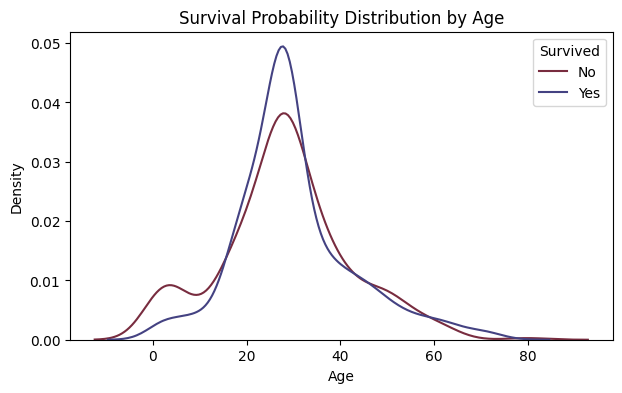

In [83]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)

# Plotting KDE plot for survival probability distribution
plt.figure(figsize=(7, 4))
sns.kdeplot(data=titanic, x='Age', hue='Survived', fill=False, common_norm=False, palette='icefire')
plt.title('Survival Probability Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<Axes: title={'center': 'Survival Distribution in different Classes'}, xlabel='Survived', ylabel='Pclass'>

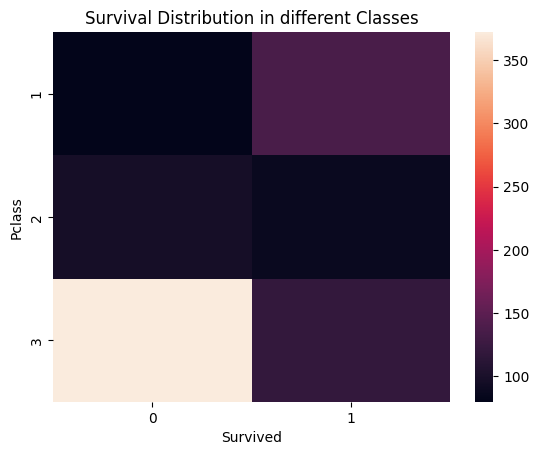

In [31]:
plt.title('Survival Distribution in different Classes')
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

<Axes: title={'center': 'Survival with Embarked'}, xlabel='Survived'>

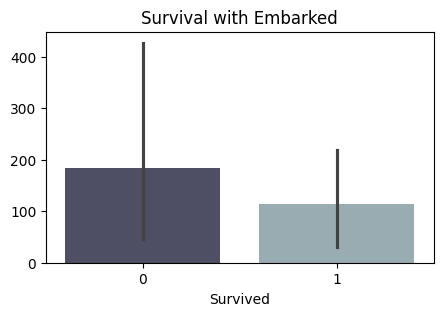

In [32]:
plt.figure(figsize=(5, 3))
plt.title('Survival with Embarked')
sns.barplot(pd.crosstab(titanic['Embarked'],titanic['Survived']),palette='bone')

<Axes: title={'center': 'Survival with Fare'}, xlabel='Survived'>

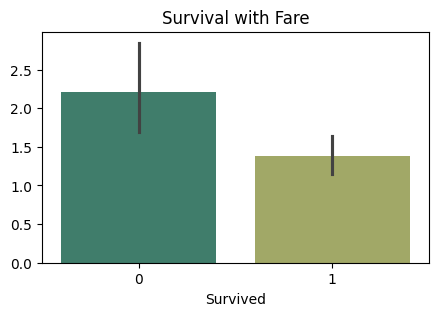

In [33]:
plt.figure(figsize=(5, 3))
plt.title('Survival with Fare')
sns.barplot(pd.crosstab(titanic['Fare'],titanic['Survived']),palette='gist_earth')

Feature Engneering

In [34]:
titanic['Family_size'] = titanic['Parch']+titanic['SibSp']

In [35]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [36]:
def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [37]:
titanic['Family_type']=titanic['Family_size'].apply(family_type)

In [38]:
titanic.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
144,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,S,0,Alone
564,0,3,"Meanwell, Miss. (Marion Ogden)",female,28.0,0,0,SOTON/O.Q. 392087,8.0500,S,0,Alone
854,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,S,1,Medium
275,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S,1,Medium
814,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,S,0,Alone


In [39]:

titanic.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

<Axes: title={'center': 'Family Type Survival Distribution'}, xlabel='Family_type', ylabel='Survived'>

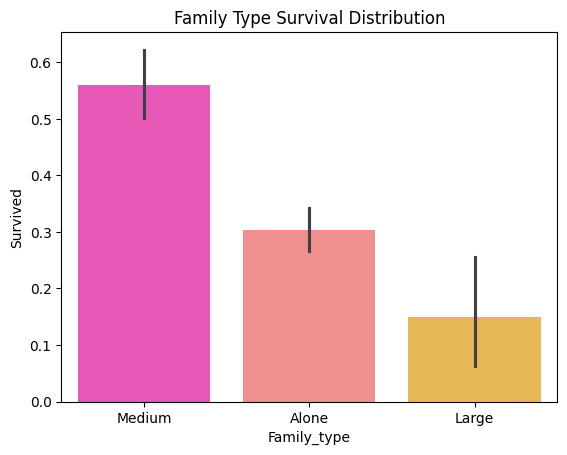

In [43]:
plt.title('Family Type Survival Distribution')
sns.barplot(data=titanic,x='Family_type',y='Survived',palette='spring',hue='Family_type',legend=None)

<Figure size 1000x800 with 0 Axes>

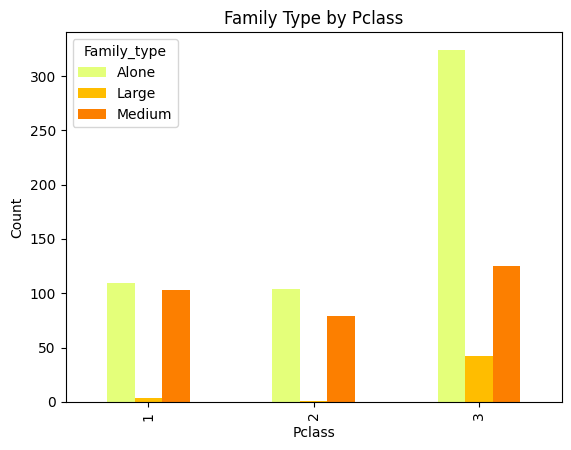

In [41]:
ct = pd.crosstab(titanic['Pclass'], titanic['Family_type'])
plt.figure(figsize=(10, 8))
ct.plot(kind='bar',colormap='Wistia')
plt.title('Family Type by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

**Drawing Conclusions**

1- Chance of female survival is higher than male survival 
2- Travelling in Pclass 3 was deadliest 
3- Somehow, people going to C survived more
4- late teens to early 30s had a higher chance of surviving.
5- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone